In this checkpoint, you are going to work on the '5G-Energy consumption' dataset that was provided by the international telecommunication union (ITU) in 2023 as part of a global challenge or competition for data scientists all over the world to solve the 5G energy consumption modelling using machine learning techniques.

The competition is taking place from 2023-07-05 to 2023-09-30. Fore more information click here.

Checkpoint problematic : Network operational expenditure (OPEX) already accounts for around 25 percent of the total telecom operator’s cost, and 90 percent of it is spent on large energy bills. More than 70 percent of this energy is estimated to be consumed by the radio access network (RAN), particularly by the base stations (BSs). Thus, the objective is to build and train a ML model to estimate the energy consumed by different 5G base stations taking into consideration the impact of various engineering configurations, traffic conditions, and energy-saving methods.

Dataset description : This dataset is derived from the original copy and simplified for learning purposes. It includes cell-level traffic statistics of 4G/5G sites collected on different days.
- Import you data and perform basic data exploration phase

    Display general information about the dataset
    Create a pandas profiling reports to gain insights into the dataset
    Handle Missing and corrupted values
    Remove duplicates, if they exist
    Handle outliers, if they exist
    Encode categorical features
- Select your target variable and the features
- Split your dataset to training and test sets
- Based on your data exploration phase select a ML regression algorithm and train it on the training set
- Assess your model performance on the test set using relevant evaluation metrics
- Discuss with your cohort alternative ways to improve your model performance


# Problem Statement
- The objective is to build and train a ML model to estimate the energy consumed by different 5G base stations taking into consideration the impact of various engineering configurations,traffic conditions,and energy-saving methods 

1. Data Exploration and Preprocessing:

a. Import Data and Basic Exploration:

In [1]:
## import libraries
import pandas as pd
import numpy as np

# for visuals
import seaborn as sns
import matplotlib.pyplot as  plt

%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

In [2]:
# Load the dataset

df=pd.read_csv('5G_energy_consumption_dataset.csv')

In [3]:
# summary statistics of the data
df.describe().astype('int')

,Energy,load,ESMODE,TXpower
count,92629,92629,92629,92629
mean,28,0,0,6
std,13,0,0,0
min,0,0,0,5
25%,18,0,0,6
50%,24,0,0,6
75%,35,0,0,6
max,100,0,4,8


The average energy level is 28, accompanied by a standard deviation of 13, indicating moderate variability. However, the median load, standing at 24, reveals a positively skewed distribution, with a notable concentration below the mean.

In terms of TXpower (Transmit Power), the mean transmit power is 6, showing minimal variability with a standard deviation of 0. Transmit power consistently falls within the range of 5 to 8 across observations, suggesting stable power settings throughout the dataset.

Regarding ESMODE (Energy Saving Mode), all recorded values are 0, indicating that the system predominantly operates in a standard mode without energy-saving features.







In [4]:
# display general information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92629 entries, 0 to 92628
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Time     92629 non-null  object 
 1   BS       92629 non-null  object 
 2   Energy   92629 non-null  float64
 3   load     92629 non-null  float64
 4   ESMODE   92629 non-null  float64
 5   TXpower  92629 non-null  float64
dtypes: float64(4), object(2)
memory usage: 4.2+ MB
None


In [5]:
# Display first few rows of the dataset
print(df.head())

              Time   BS     Energy      load  ESMODE   TXpower
0  20230101 010000  B_0  64.275037  0.487936     0.0  7.101719
1  20230101 020000  B_0  55.904335  0.344468     0.0  7.101719
2  20230101 030000  B_0  57.698057  0.193766     0.0  7.101719
3  20230101 040000  B_0  55.156951  0.222383     0.0  7.101719
4  20230101 050000  B_0  56.053812  0.175436     0.0  7.101719


b. Pandas profiling Report:

In [6]:
df.shape

(92629, 6)

In [8]:
#Import pandas profiling library
from pandas_profiling import ProfileReport

In [9]:
# Generate pandas profiling report
profile=ProfileReport(df)
profile.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

c. Handling Missing and Corrupted Values:

In [10]:
# Check for missing values
print(df.isnull().sum())

Time       0
BS         0
Energy     0
load       0
ESMODE     0
TXpower    0
dtype: int64


d. Removing Duplicates:

# Data Preprocessing

In [11]:
df.columns.tolist()

['Time', 'BS', 'Energy', 'load', 'ESMODE', 'TXpower']

In [12]:
# select numerical variables
num_vars=df.select_dtypes(include=['float','int64']).columns.tolist()
print(num_vars)

# value counts for numerical variables
for column in num_vars:
    print(df[column].value_counts())

['Energy', 'load', 'ESMODE', 'TXpower']
17.937220    1014
17.787743     921
18.236173     898
18.385650     895
18.086697     889
             ... 
98.355755       1
85.650224       1
97.010463       1
96.711510       1
96.412556       1
Name: Energy, Length: 612, dtype: int64
0.008260    71
0.008240    71
0.045923    70
0.008270    55
0.008300    49
            ..
0.569074     1
0.610043     1
0.285777     1
0.467277     1
0.058077     1
Name: load, Length: 58563, dtype: int64
0.000000    87475
2.000000     1299
1.999722      226
0.002500      134
0.000556      122
            ...  
0.378611        1
1.805833        1
1.467778        1
0.317500        1
0.983333        1
Name: ESMODE, Length: 1713, dtype: int64
6.875934    40444
6.427504    26693
7.100897    13277
7.101719     2523
6.876682     1445
6.128550      986
7.325859      879
5.979073      781
6.651719      673
8.034529      342
6.726457      336
6.576981      332
5.680120      329
6.727205      325
6.502990      324
6.532138

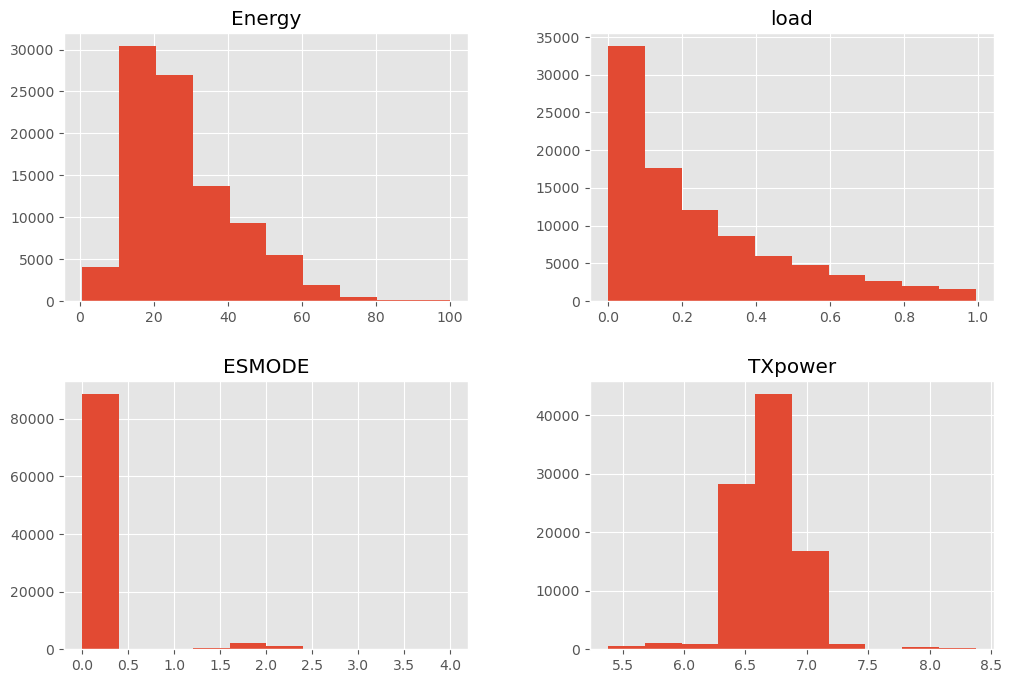

In [13]:
# showing the distribution of numeric columns
df.hist(figsize=(12,8));

In [14]:
# check for duplicates
df.duplicated().sum()

0

e.handling outliers

Energy     2192
load       2974
ESMODE     5154
TXpower    1169
dtype: int64


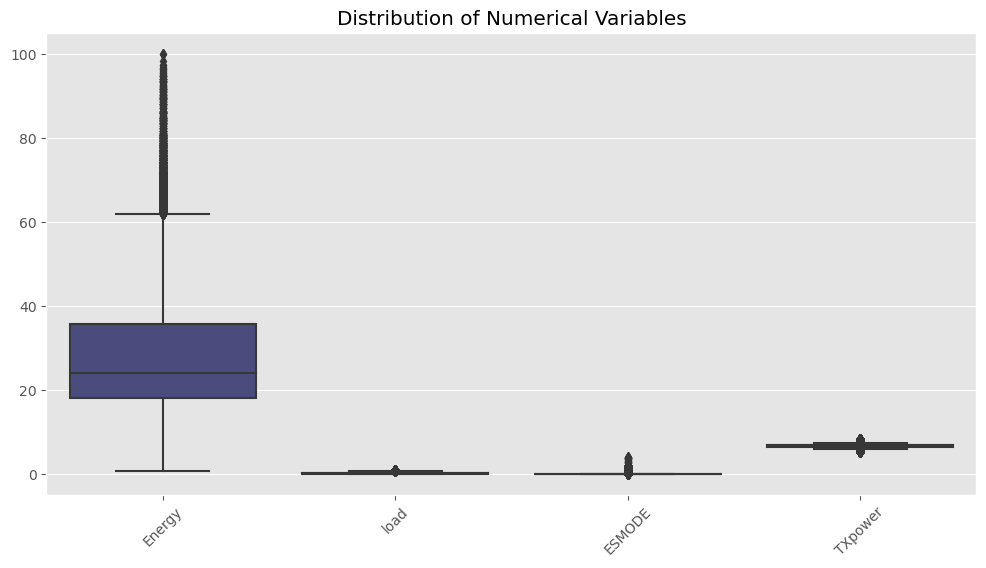

In [15]:
# Extract the numerical columns from the dataset
num_vars = df.select_dtypes(include=['int64', 'float64'])
# Calculate the number of outliers for each numerical variable
outliers_count = ((num_vars < num_vars.quantile(0.25) - 1.5 * (num_vars.quantile(0.75) - num_vars.quantile(0.25))) |
                  (num_vars > num_vars.quantile(0.75) + 1.5 * (num_vars.quantile(0.75) - num_vars.quantile(0.25))))
outliers_count = outliers_count.sum()

# Display the number of outliers in a table
print(outliers_count)

# Create a boxplot to show the distribution of each numerical variable
plt.figure(figsize=(12, 6))
sns.boxplot(data=num_vars, palette='viridis')
plt.title('Distribution of Numerical Variables')
plt.xticks(rotation=45)
plt.show()


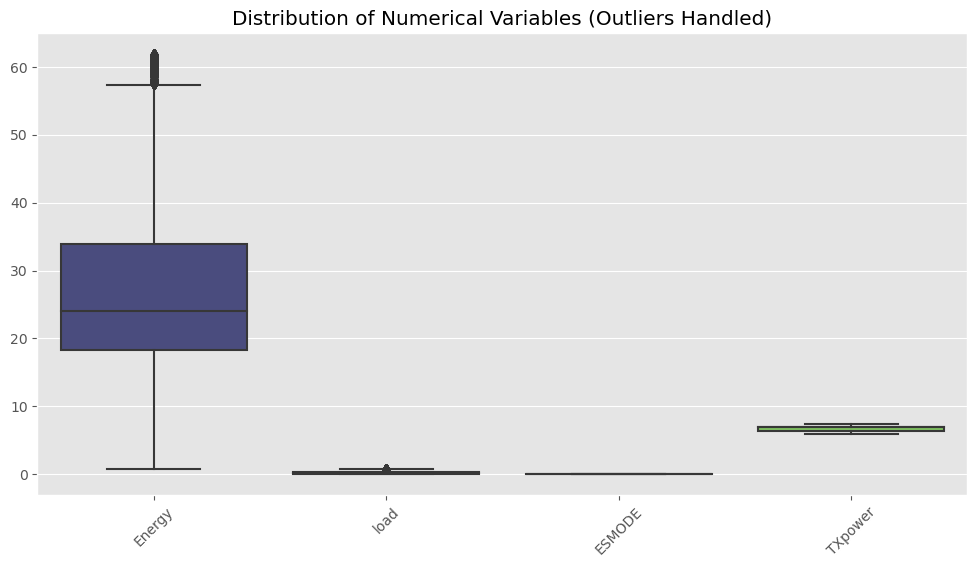

In [16]:
# Calculate the median of each numerical variable
medians = num_vars.median()

# Replace outliers with the median of each variable
for column in num_vars.columns:
    q1 = num_vars[column].quantile(0.25)
    q3 = num_vars[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    num_vars[column] = num_vars[column].apply(lambda x: medians[column] if x < lower_bound or x > upper_bound else x)

# Create a boxplot to show the distribution of each numerical variable after handling outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=num_vars, palette='viridis')
plt.title('Distribution of Numerical Variables (Outliers Handled)')
plt.xticks(rotation=45)
plt.show()

The outliers in the numerical variables has been removed by replacing it with the median of the columns

In [17]:
df

,Time,BS,Energy,load,ESMODE,TXpower
0,20230101 010000,B_0,64.275037,0.487936,0.0,7.101719
1,20230101 020000,B_0,55.904335,0.344468,0.0,7.101719
2,20230101 030000,B_0,57.698057,0.193766,0.0,7.101719
3,20230101 040000,B_0,55.156951,0.222383,0.0,7.101719
4,20230101 050000,B_0,56.053812,0.175436,0.0,7.101719
...,...,...,...,...,...,...
92624,20230102 170000,B_1018,14.648729,0.087538,0.0,7.325859
92625,20230102 180000,B_1018,14.648729,0.082635,0.0,7.325859
92626,20230102 210000,B_1018,13.452915,0.055538,0.0,7.325859
92627,20230102 220000,B_1018,13.602392,0.058077,0.0,7.325859


In [18]:
df.drop(columns='Time',inplace=True)
df

,BS,Energy,load,ESMODE,TXpower
0,B_0,64.275037,0.487936,0.0,7.101719
1,B_0,55.904335,0.344468,0.0,7.101719
2,B_0,57.698057,0.193766,0.0,7.101719
3,B_0,55.156951,0.222383,0.0,7.101719
4,B_0,56.053812,0.175436,0.0,7.101719
...,...,...,...,...,...
92624,B_1018,14.648729,0.087538,0.0,7.325859
92625,B_1018,14.648729,0.082635,0.0,7.325859
92626,B_1018,13.452915,0.055538,0.0,7.325859
92627,B_1018,13.602392,0.058077,0.0,7.325859


f. Encoding Categorical Features:
    
    

In [19]:
from sklearn.preprocessing import LabelEncoder
# Assuming 'df' is your DataFrame
columns_to_encode = ["BS"]

# Create a label encoder instance
label_encoder = LabelEncoder()

# Apply label encoding to each categorical column
for column in columns_to_encode:
    df[column] = label_encoder.fit_transform(df[column])

# Display the updated DataFrame
print(df.head())

   BS     Energy      load  ESMODE   TXpower
0   0  64.275037  0.487936     0.0  7.101719
1   0  55.904335  0.344468     0.0  7.101719
2   0  57.698057  0.193766     0.0  7.101719
3   0  55.156951  0.222383     0.0  7.101719
4   0  56.053812  0.175436     0.0  7.101719


## Model Selection 
- It is a regression task. In this task we will be using the following algorithmns
  - Linear regression
  - Decision tree regression
  - Random forest regression
  - Lasso Regression

### Feature Selections
- The target is what you want to predict. In this case, we want to predict Energy consumed
- The independent variables after dropping the target is our X, which is what we are going to train our model.


# 3. Perform Feature Selection:

In [20]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [21]:
# Perform feature selection using SelectKBest and f_regression
y=df['Energy']

y.head()



0    64.275037
1    55.904335
2    57.698057
3    55.156951
4    56.053812
Name: Energy, dtype: float64

In [22]:
# select the independent variables
X=df.drop('Energy',axis=1)
X.head()

,BS,load,ESMODE,TXpower
0,0,0.487936,0.0,7.101719
1,0,0.344468,0.0,7.101719
2,0,0.193766,0.0,7.101719
3,0,0.222383,0.0,7.101719
4,0,0.175436,0.0,7.101719


# Splitting Dataset into Training and Test Sets:
We will split the dataset into training and testing set. Typically, we will allocate a certain percentage of 70-30 for training and testing, respectively. This will be done using the train_test_split function from scikit-learn.

In [23]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

print('\n', X_train.head(2))
print('\n', X_test.head(2))
print('\n', y_train.head(2))
print('\n', y_test.head(2))


         BS      load  ESMODE   TXpower
47956  378  0.502570     0.0  7.100897
91857  885  0.070096     0.0  7.325859

         BS      load    ESMODE   TXpower
65601  553  0.372528  0.000000  7.100897
2220   129  0.013640  1.885278  6.875934

 47956    56.950673
91857    14.648729
Name: Energy, dtype: float64

 65601    44.843049
2220     20.478326
Name: Energy, dtype: float64


In [24]:
# check the shape of the splitted data
print(f'The X_train shape: {X_train.shape}')
print(f'The X_test shape: {X_test.shape}')
print(f'The y_train shape: {y_train.shape}')
print(f'The y_test shape: {y_test.shape}')

The X_train shape: (64840, 4)
The X_test shape: (27789, 4)
The y_train shape: (64840,)
The y_test shape: (27789,)


## Standardization
- We will scale the features of the data using MinMax Scaler from scikit-learn.

In [25]:
from sklearn.preprocessing import MinMaxScaler

# Create an instance of MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the validation and test data
X_test_scaled = scaler.transform(X_test)


In [26]:
# import the necessary libraries for the model building
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# algorithms for the evaluation of model performance
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

## Linear Regression 

In [27]:
lr_model = LinearRegression()

# fit the the model
lr_model.fit(X_train_scaled, y_train)

LinearRegression()

In [28]:
# create predictions
y_pred = lr_model.predict(X_test_scaled)

In [29]:
# manually compare the Energy consumption
print('Actual Energy: ', y.head().tolist())
print('..........................................')
print('Predicted Energy: ', np.round(y_pred[:5].tolist(), 2))

Actual Energy:  [64.27503737, 55.90433483, 57.6980568, 55.15695067, 56.05381166]
..........................................
Predicted Energy:  [37.78 11.44 17.94 44.75 20.24]


In [30]:
# model evaluation
linear_mse = mean_squared_error(y_test, y_pred)
linear_r2 = r2_score(y_test, y_pred)
linear_mae = mean_absolute_error(y_test, y_pred)
linear_rmse = mean_squared_error(y_test, y_pred, squared = False)

print('R2 of Linear Regression:', linear_r2.round(2))
print('MAE of Linear Regression:', linear_mae.round(2))
print('MSE of Linear Regression:', linear_mse.round(2))
print('RMSE of Linear Regression:', linear_rmse.round(2))

R2 of Linear Regression: 0.56
MAE of Linear Regression: 6.88
MSE of Linear Regression: 85.53
RMSE of Linear Regression: 9.25


- 1. R-squared (R2): R-squared is a measure of how well the independent variables explain the variability of the dependent variable. It ranges from 0 to 1, where 1 indicates that the model explains all the variability of the response data around its mean. In this case, an R2 of 0.56 suggests that approximately 56% of the variability in the dependent variable is explained by the independent variables in the linear regression model.
- 2. Mean Absolute Error (MAE): MAE is the average of the absolute errors between the predicted values and the actual values. It provides a measure of the average magnitude of the errors in the predictions. A MAE of 6.88 means that, on average, the predictions of the linear regression model are off by approximately 6.88 units.
- 3. Mean Squared Error (MSE): MSE is the average of the squared differences between the predicted values and the actual values. It emphasizes larger errors more than smaller ones because of the squaring operation. A MSE of 85.53 indicates that, on average, the squared difference between the predicted values and the actual values is 85.53.
- 4. Root Mean Squared Error (RMSE): RMSE is the square root of the MSE. It represents the standard deviation of the residuals (the differences between predicted and actual values). An RMSE of 9.25 suggests that, on average, the predictions of the linear regression model are off by approximately 9.25 units, which is the same unit as the dependent variable.

In summary, the linear regression model with these metrics indicates that it explains a moderate amount of the variability in the dependent variable, and on average, the predictions have a moderate error of around 6.88 units, with a more substantial error (standard deviation) of approximately 9.25 units.

# Random Forest Regressor

In [31]:
rf_model = RandomForestRegressor()

# fit the the model
rf_model.fit(X_train_scaled, y_train)

RandomForestRegressor()

In [32]:
# create predictions
y_pred = rf_model.predict(X_test_scaled)

In [33]:
# manually compare the Energy consumption
print('Actual Energy: ', y.head().tolist())
print('..........................................')
print('Predicted Energy: ', np.round(y_pred[:5].tolist(), 2))

Actual Energy:  [64.27503737, 55.90433483, 57.6980568, 55.15695067, 56.05381166]
..........................................
Predicted Energy:  [49.39  9.91 14.64 57.22 37.96]


In [34]:
# model evaluation
rf_mse = mean_squared_error(y_test, y_pred)
rf_r2 = r2_score(y_test, y_pred)
rf_mae = mean_absolute_error(y_test, y_pred)
rf_rmse = mean_squared_error(y_test, y_pred, squared = False)

print('R2 of Random Forest Regressor:', rf_r2.round(2))
print('MAE of Random Forest Regressor:', rf_mae.round(2))
print('MSE of Random Forest Regressor:', rf_mse.round(2))
print('RMSE of Random Forest Regressor:', rf_rmse.round(2))

R2 of Random Forest Regressor: 0.94
MAE of Random Forest Regressor: 2.08
MSE of Random Forest Regressor: 10.9
RMSE of Random Forest Regressor: 3.3


- 1.R-squared (R2): The R-squared value of 0.94 suggests that approximately 94% of the variability in the dependent variable is explained by the independent variables in the Random Forest Regressor model. This indicates a very strong fit to the data, much better than the linear regression model.
- 2.Mean Absolute Error (MAE): The MAE of 2.08 means that, on average, the predictions of the Random Forest Regressor model are off by approximately 2.08 units. This indicates a relatively low average error in the predictions compared to the linear regression model.
- 3.Mean Squared Error (MSE): The MSE of 10.87 indicates that, on average, the squared difference between the predicted values and the actual values is 10.87. This is significantly lower than the MSE of the linear regression model, suggesting that the Random Forest Regressor model provides more accurate predictions.
- 4.Root Mean Squared Error (RMSE): The RMSE of 3.3 is the square root of the MSE and represents the standard deviation of the residuals. An RMSE of 3.3 suggests that, on average, the predictions of the Random Forest Regressor model are off by approximately 3.3 units, which is considerably lower than the RMSE of the linear regression model.

In summary, the Random Forest Regressor model outperforms the linear regression model significantly, as evidenced by its higher R-squared value and lower error metrics (MAE, MSE, and RMSE). It indicates a strong fit to the data and provides more accurate predictions.

## Lasso Regression 

In [35]:
lasso_model =  Lasso(alpha = 0.5)

# fit the the model
lasso_model.fit(X_train_scaled, y_train)

Lasso(alpha=0.5)

In [36]:
# create predictions
y_pred = lasso_model.predict(X_test_scaled)

In [37]:
# manually compare the Energy comsuption
print('Actual Energy: ', y.head().tolist())
print('..........................................')
print('Predicted Energy: ', np.round(y_pred[:5].tolist(), 2))

Actual Energy:  [64.27503737, 55.90433483, 57.6980568, 55.15695067, 56.05381166]
..........................................
Predicted Energy:  [31.98 21.44 23.2  38.76 21.53]


In [38]:
# model evaluation
lasso_mse = mean_squared_error(y_test, y_pred)
lasso_r2 = r2_score(y_test, y_pred)
lasso_mae = mean_absolute_error(y_test, y_pred)
lasso_rmse = mean_squared_error(y_test, y_pred, squared = False)

print('R2 of Lasso Regressor:', lasso_r2.round(2))
print('MAE of Lasso Regressor:', lasso_mae.round(2))
print('MSE of Lasso Regressor:', lasso_mse.round(2))
print('RMSE of Lasso Regressor:', lasso_rmse.round(2))

R2 of Lasso Regressor: 0.4
MAE of Lasso Regressor: 8.3
MSE of Lasso Regressor: 116.38
RMSE of Lasso Regressor: 10.79


- 1.R-squared (R2): The R-squared value of 0.4 suggests that approximately 40% of the variability in the dependent variable is explained by the independent variables in the Lasso Regressor model. This indicates a moderate fit to the data, but it's lower compared to the Random Forest Regressor.
- 2.Mean Absolute Error (MAE): The MAE of 8.3 means that, on average, the predictions of the Lasso Regressor model are off by approximately 8.3 units. This indicates a moderate average error in the predictions.
- 3.Mean Squared Error (MSE): The MSE of 116.38 indicates that, on average, the squared difference between the predicted values and the actual values is 116.38. This is higher than both the Random Forest Regressor and the linear regression model, suggesting that the Lasso Regressor model has higher prediction errors.
- 4.Root Mean Squared Error (RMSE): The RMSE of 10.79 is the square root of the MSE and represents the standard deviation of the residuals. An RMSE of 10.79 suggests that, on average, the predictions of the Lasso Regressor model are off by approximately 10.79 units, which is higher compared to the Random Forest Regressor and the linear regression model.

In summary, the Lasso Regressor model has a lower R-squared value and higher error metrics (MAE, MSE, and RMSE) compared to the Random Forest Regressor, indicating a weaker fit to the data and less accurate predictions. However, it's still performing better than the linear regression model.

In [39]:
dc_model = DecisionTreeRegressor()

# fit the the model
dc_model.fit(X_train_scaled, y_train)

DecisionTreeRegressor()

In [40]:
# create predictions
y_pred = dc_model.predict(X_test_scaled)

In [41]:
# manually compare the energy consumed
print('Actual Energy: ', y.head().tolist())
print('..........................................')
print('Predicted Energy: ', np.round(y_pred[:5].tolist(), 2))

Actual Energy:  [64.27503737, 55.90433483, 57.6980568, 55.15695067, 56.05381166]
..........................................
Predicted Energy:  [47.23 10.31 13.75 55.16 38.27]


In [42]:
# model evaluation
dc_mse = mean_squared_error(y_test, y_pred)
dc_r2 = r2_score(y_test, y_pred)
dc_mae = mean_absolute_error(y_test, y_pred)
dc_rmse = mean_squared_error(y_test, y_pred, squared = False)

print('R2 of Decision Tree Regressor:', dc_r2.round(2))
print('MAE of Decision Tree Regressor:', dc_mae.round(2))
print('MSE of Decision Tree Regressor:', dc_mse.round(2))
print('RMSE of Decision Tree Regressor:', dc_rmse.round(2))

R2 of Decision Tree Regressor: 0.91
MAE of Decision Tree Regressor: 2.56
MSE of Decision Tree Regressor: 17.87
RMSE of Decision Tree Regressor: 4.23


- 1.R-squared (R2): The R-squared value of 0.91 suggests that approximately 91% of the variability in the dependent variable is explained by the independent variables in the Decision Tree Regressor model. This indicates a very strong fit to the data, comparable to the Random Forest Regressor.
- 2.Mean Absolute Error (MAE): The MAE of 2.56 means that, on average, the predictions of the Decision Tree Regressor model are off by approximately 2.56 units. This indicates a relatively low average error in the predictions, which is similar to the Random Forest Regressor.
- 3.Mean Squared Error (MSE): The MSE of 17.88 indicates that, on average, the squared difference between the predicted values and the actual values is 17.88. This is higher than the Random Forest Regressor but still relatively low.
- 4.Root Mean Squared Error (RMSE): The RMSE of 4.23 is the square root of the MSE and represents the standard deviation of the residuals. An RMSE of 4.23 suggests that, on average, the predictions of the Decision Tree Regressor model are off by approximately 4.23 units, which is higher than the Random Forest Regressor but still reasonable.

In summary, the Decision Tree Regressor model performs very well, similar to the Random Forest Regressor, with high R-squared value and low error metrics (MAE, MSE, and RMSE). It indicates a strong fit to the data and provides accurate predictions.

R2 of Random Forest Regressor: 0.94
MAE of Random Forest Regressor: 2.08
MSE of Random Forest Regressor: 10.87
RMSE of Random Forest Regressor: 3.3

R2 of Linear Regression: 0.56
MAE of Linear Regression: 6.88
MSE of Linear Regression: 85.53
RMSE of Linear Regression: 9.25

R2 of Lasso Regressor: 0.4
MAE of Lasso Regressor: 8.3
MSE of Lasso Regressor: 116.38
RMSE of Lasso Regressor: 10.79

R2 of Decision Tree Regressor: 0.91
MAE of Decision Tree Regressor: 2.56
MSE of Decision Tree Regressor: 17.88
RMSE of Decision Tree Regressor: 4.23



In summary:
    
- Random Forest Regressor outperforms other models with the highest R2 and lowest error metrics.
- Decision Tree Regressor performs well with high R2 and relatively low error metrics. 
- Linear Regression has moderate performance with an R2 of 0.56 and higher error metrics compared to Random Forest and Decision Tree.
- Lasso Regressor has the lowest performance among the models with the lowest R2 and highest error metrics.